In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset_train = pd.read_csv('/content/IAM - Données Historiques (1).csv')
#training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
dataset_train=dataset_train[["Dernier"]].copy()
training_set=dataset_train.replace('[^\d].','',regex=True).astype(float)

In [ ]:
dataset_train.head()

,Dernier
0,"140,70"
1,"141,00"
2,"139,90"
3,"139,50"
4,"140,60"


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 11s 117ms/step - loss: 0.0577
Epoch 2/100
37/37 [==============================] - 4s 117ms/step - loss: 0.0149
Epoch 3/100
37/37 [==============================] - 4s 116ms/step - loss: 0.0133
Epoch 4/100
37/37 [==============================] - 4s 118ms/step - loss: 0.0120
Epoch 5/100
37/37 [==============================] - 4s 117ms/step - loss: 0.0105
Epoch 6/100
37/37 [==============================] - 4s 116ms/step - loss: 0.0108
Epoch 7/100
37/37 [==============================] - 4s 118ms/step - loss: 0.0109
Epoch 8/100
37/37 [==============================] - 4s 116ms/step - loss: 0.0099
Epoch 9/100
37/37 [==============================] - 4s 117ms/step - loss: 0.0096
Epoch 10/100
37/37 [==============================] - 4s 114ms/step - loss: 0.0100
Epoch 11/100
37/37 [==============================] - 4s 118ms/step - loss: 0.0098
Epoch 12/100
37/37 [==============================] - 4s 118ms/step - loss: 0.0091
Epoch 13/100

In [ ]:
dataset_test = pd.read_csv('/content/IAM - Données Historiques (1).csv')


In [ ]:
dataset_test=dataset_test[["Dernier"]].copy()
testing_set=dataset_test.replace('[^\d].','',regex=True).astype(float)
real_stock_price=testing_set

In [ ]:
dataset_total = pd.concat((training_set['Dernier'], testing_set['Dernier']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

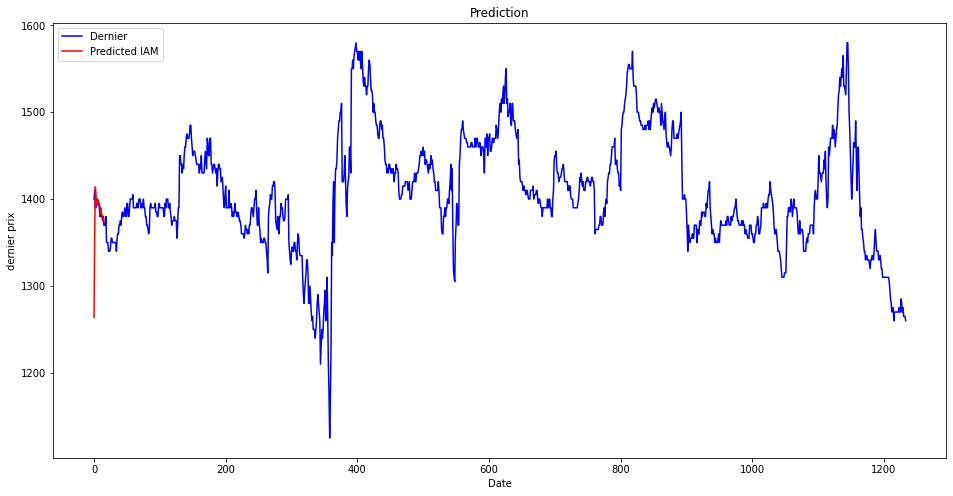

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(real_stock_price, color = 'blue', label = 'Dernier ')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted IAM')
plt.title('Prediction')
plt.xlabel('Date')
plt.ylabel('dernier prix')
plt.legend()
plt.show()